## 数据分析

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

rc = {'font.sans-serif': 'SimHei',
      'axes.unicode_minus': False}
sns.set_theme(style="whitegrid", rc=rc)

In [2]:
df = pd.read_csv('data/train.csv')
cols = df.columns

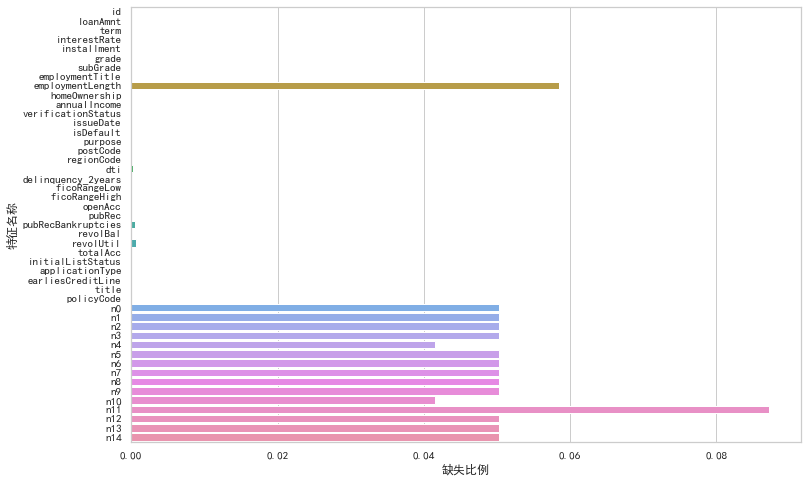

In [3]:
plt.figure(figsize=(12, 8))
x_name = '特征名称'
y_name = '缺失比例'
sns.barplot(data=df.isna().mean(axis=0).reset_index().rename(columns={'index': x_name, 0: y_name}), 
            y=x_name, x=y_name)
plt.show()

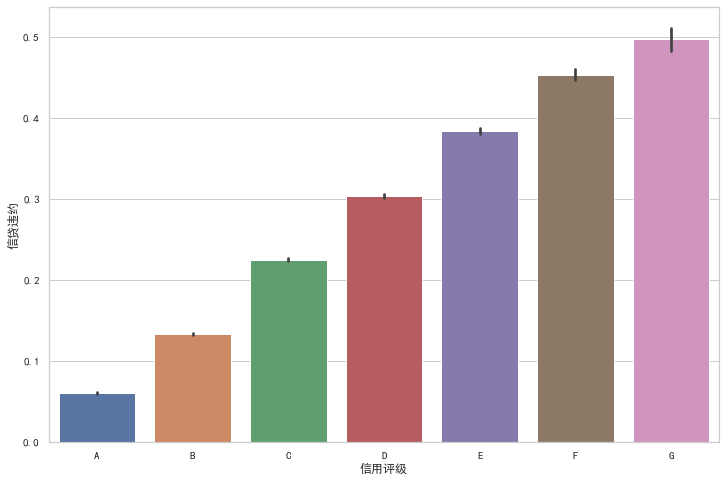

In [4]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='grade', y='isDefault', order=list('ABCDEFG'))
plt.xlabel('信用评级')
plt.ylabel('信贷违约')
plt.show()

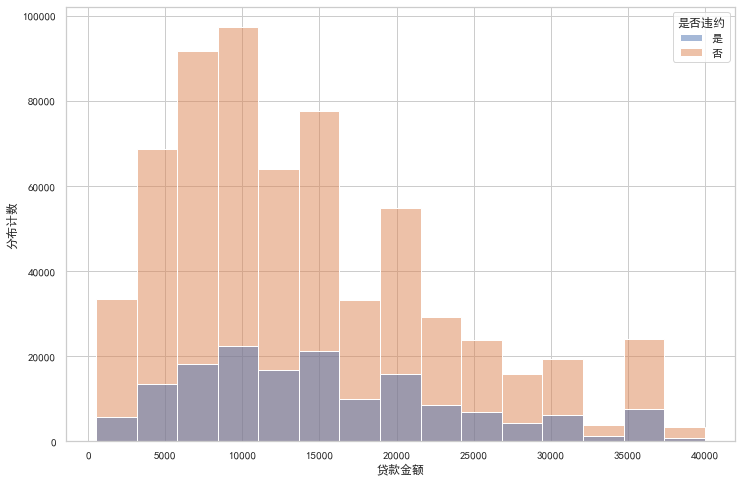

In [3]:
fig = plt.figure(figsize=(12, 8))
df['是否违约'] = df['isDefault'].map({0: '否', 1: '是'})
sns.histplot(df, x='loanAmnt', hue='是否违约', bins=15)
plt.xlabel('贷款金额')
plt.ylabel('分布计数')
plt.show()

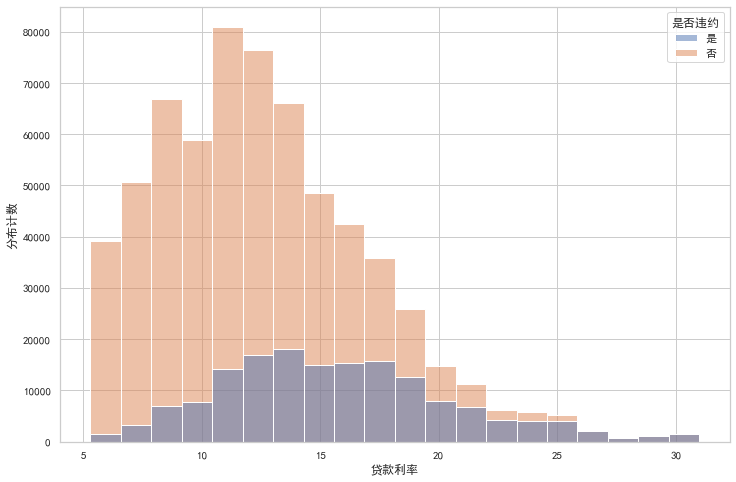

In [4]:
plt.figure(figsize=(12, 8))
sns.histplot(df, x='interestRate', hue='是否违约', bins=20)
plt.xlabel('贷款利率')
plt.ylabel('分布计数')
plt.show()

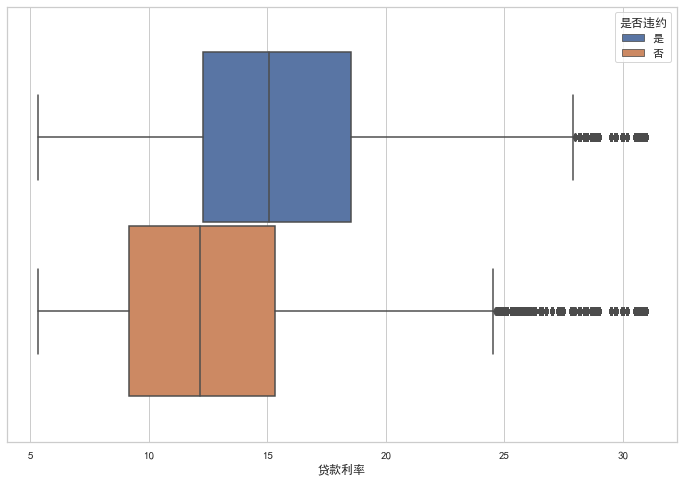

In [5]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='interestRate', y=[''] * len(df), hue='是否违约')
plt.xlabel('贷款利率')
plt.show()

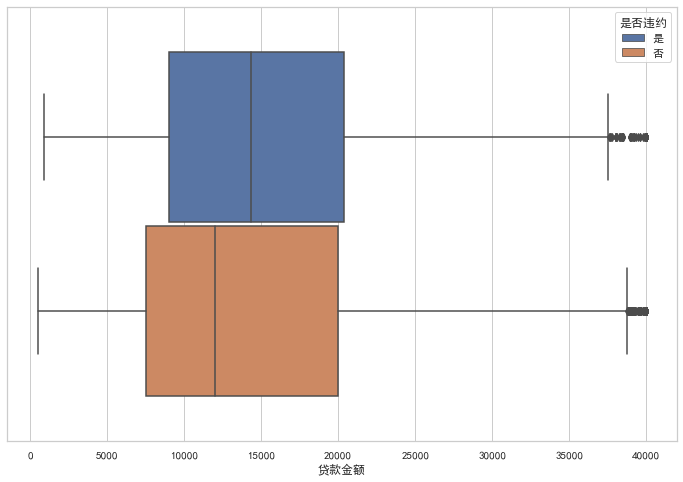

In [6]:
plt.figure(figsize=(12, 8))
sns.boxplot(df, x='loanAmnt',y=[''] * len(df), hue='是否违约')
plt.xlabel('贷款金额')
plt.show()

## 初级学习器

In [1]:
import os
import pickle
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, auc, roc_curve
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

from src.process import Processor, TranTestSplit
from src.models import ModelHub
from src.metric import Metric

E:\anaconda3\lib\site-packages\dask\dataframe\utils.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('data/train.csv')
processor = Processor(df)
processor.sample(pos_frac=0.05, neg_frac=0.1)
feature, label = processor.data_preprocess_v1()

start: read_data ...done
start: drop_column ...done
start: convert_time_col ...done
start: convert_employment_length ...done
start: convert_earlies_credit_line ...done
start: make_dummies ...done
start: get_label ...done


In [3]:
n_split = 5
tts = TranTestSplit(feature, label)
train_x, train_y, test_x, test_y = tts.split()

train_x, train_y = processor.imbalance_sample(train_x, train_y)

In [4]:
model_names = [
    'logit',
    'random_forest',
    'xgboost',
    'deep_forest',
    'lightgbm',
    'catboost'
]

result = {}

In [5]:
model = ModelHub('logit', params={'solver': 'liblinear'})
model.fit(train_x, train_y)
proba = model.predict_proba(test_x)
result['logit'] = proba[:, 1]

In [6]:
model = ModelHub('random_forest', params={'n_estimators': 10})
model.fit(train_x, train_y)
proba = model.predict_proba(test_x)
result['random_forest'] = proba[:, 1]

In [7]:
model = ModelHub('xgboost', params={'n_estimators': 10})
model.fit(train_x, train_y)
proba = model.predict_proba(test_x)
result['xgboost'] = proba[:, 1]

In [8]:
model = ModelHub('lightgbm', params={'n_estimators': 10})
model.fit(train_x, train_y)
proba = model.predict_proba(test_x)
result['lightgbm'] = proba[:, 1]

In [9]:
model = ModelHub('catboost', params={'n_estimators': 10})
model.fit(train_x, train_y)
proba = model.predict_proba(test_x)
result['catboost'] = proba[:, 1]

Learning rate set to 0.5
0:	learn: 0.4019236	total: 128ms	remaining: 1.15s
1:	learn: 0.2861702	total: 145ms	remaining: 582ms
2:	learn: 0.2393485	total: 161ms	remaining: 375ms
3:	learn: 0.2298291	total: 178ms	remaining: 267ms
4:	learn: 0.2106649	total: 200ms	remaining: 200ms
5:	learn: 0.2075654	total: 229ms	remaining: 153ms
6:	learn: 0.2019445	total: 245ms	remaining: 105ms
7:	learn: 0.2004787	total: 259ms	remaining: 64.7ms
8:	learn: 0.1992984	total: 275ms	remaining: 30.6ms
9:	learn: 0.1981986	total: 290ms	remaining: 0us


In [10]:
model = ModelHub('deep_forest', params={'n_estimators': 10})
model.fit(train_x, train_y)
proba = model.predict_proba(test_x)
result['deep_forest'] = proba[:, 1]

[2024-05-23 13:34:30.202] Start to fit the model:
[2024-05-23 13:34:30.202] Fitting cascade layer = 0 
[2024-05-23 13:39:33.903] layer = 0  | Val Acc = 93.695 % | Elapsed = 303.701 s
[2024-05-23 13:39:34.542] Fitting cascade layer = 1 
[2024-05-23 13:44:18.594] layer = 1  | Val Acc = 93.871 % | Elapsed = 284.050 s
[2024-05-23 13:44:19.117] Fitting cascade layer = 2 
[2024-05-23 13:48:41.310] layer = 2  | Val Acc = 93.873 % | Elapsed = 262.193 s
[2024-05-23 13:48:41.815] Fitting cascade layer = 3 
[2024-05-23 13:53:05.791] layer = 3  | Val Acc = 93.843 % | Elapsed = 263.976 s
[2024-05-23 13:53:05.792] Early stopping counter: 1 out of 2
[2024-05-23 13:53:06.279] Fitting cascade layer = 4 
[2024-05-23 13:57:32.017] layer = 4  | Val Acc = 93.821 % | Elapsed = 265.738 s
[2024-05-23 13:57:32.017] Early stopping counter: 2 out of 2
[2024-05-23 13:57:32.017] Handling early stopping
[2024-05-23 13:57:32.481] The optimal number of layers: 3
[2024-05-23 13:57:32.905] Start to evalute the model:
[

In [11]:
result['label'] = test_y

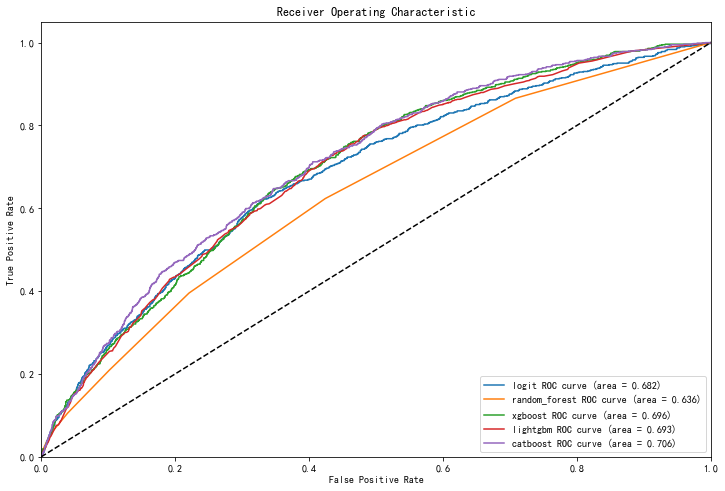

In [20]:
plt.figure(figsize=(12, 8))

fpr, tpr, thresholds = roc_curve(result['label'], result['logit'])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='logit ROC curve (area = %0.3f)' % roc_auc)

fpr, tpr, thresholds = roc_curve(result['label'], result['random_forest'])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='random_forest ROC curve (area = %0.3f)' % roc_auc)

fpr, tpr, thresholds = roc_curve(result['label'], result['xgboost'])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='xgboost ROC curve (area = %0.3f)' % roc_auc)

fpr, tpr, thresholds = roc_curve(result['label'], result['lightgbm'])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='lightgbm ROC curve (area = %0.3f)' % roc_auc)

fpr, tpr, thresholds = roc_curve(result['label'], result['catboost'])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='catboost ROC curve (area = %0.3f)' % roc_auc)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

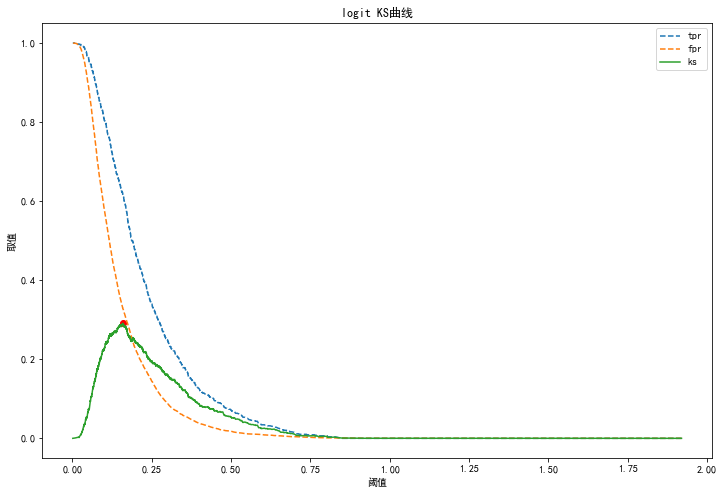

In [29]:
fpr, tpr, thresholds = roc_curve(result['label'], result['logit'])
plt.figure(figsize=(12, 8))
plt.plot(thresholds, tpr, label='tpr', linestyle='--')
plt.plot(thresholds, fpr, label='fpr', linestyle='--')
ks = np.abs(fpr - tpr)
max_idx = ks.argmax()
plt.plot(thresholds, ks, label='ks')
plt.scatter(thresholds[max_idx], ks[max_idx], marker='o', color='red')
plt.xlabel('阈值')
plt.ylabel('取值')
plt.title('logit KS曲线')
# plt.annotate('threshold: {}'.format(thresholds[max_idx]), xy=(thresholds[max_idx], ks[max_idx]))
plt.legend()
plt.show()

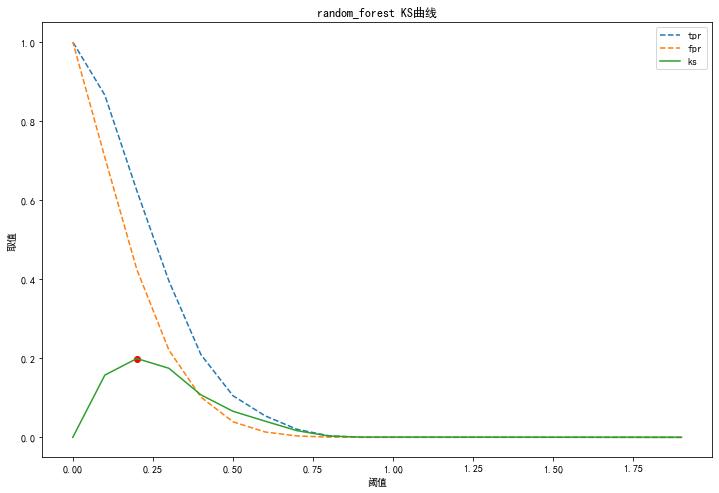

In [30]:
fpr, tpr, thresholds = roc_curve(result['label'], result['random_forest'])
plt.figure(figsize=(12, 8))
plt.plot(thresholds, tpr, label='tpr', linestyle='--')
plt.plot(thresholds, fpr, label='fpr', linestyle='--')
ks = np.abs(fpr - tpr)
max_idx = ks.argmax()
plt.plot(thresholds, ks, label='ks')
plt.scatter(thresholds[max_idx], ks[max_idx], marker='o', color='red')
plt.xlabel('阈值')
plt.ylabel('取值')
plt.title('random_forest KS曲线')
# plt.annotate('threshold: {}'.format(thresholds[max_idx]), xy=(thresholds[max_idx], ks[max_idx]))
plt.legend()
plt.show()

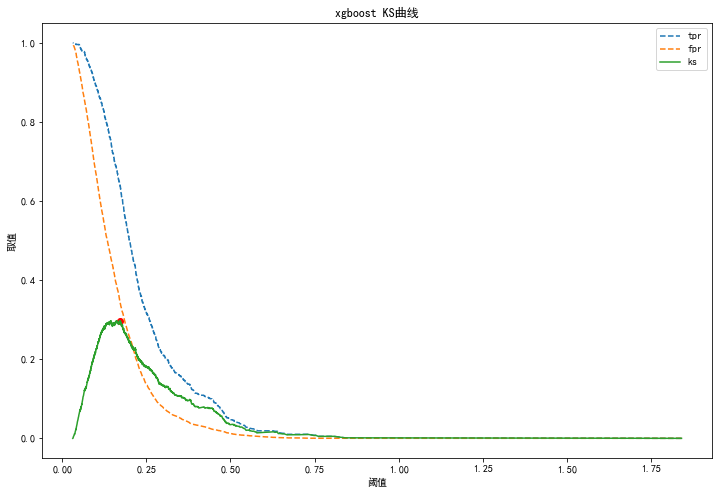

In [31]:
fpr, tpr, thresholds = roc_curve(result['label'], result['xgboost'])
plt.figure(figsize=(12, 8))
plt.plot(thresholds, tpr, label='tpr', linestyle='--')
plt.plot(thresholds, fpr, label='fpr', linestyle='--')
ks = np.abs(fpr - tpr)
max_idx = ks.argmax()
plt.plot(thresholds, ks, label='ks')
plt.scatter(thresholds[max_idx], ks[max_idx], marker='o', color='red')
plt.xlabel('阈值')
plt.ylabel('取值')
plt.title('xgboost KS曲线')
# plt.annotate('threshold: {}'.format(thresholds[max_idx]), xy=(thresholds[max_idx], ks[max_idx]))
plt.legend()
plt.show()

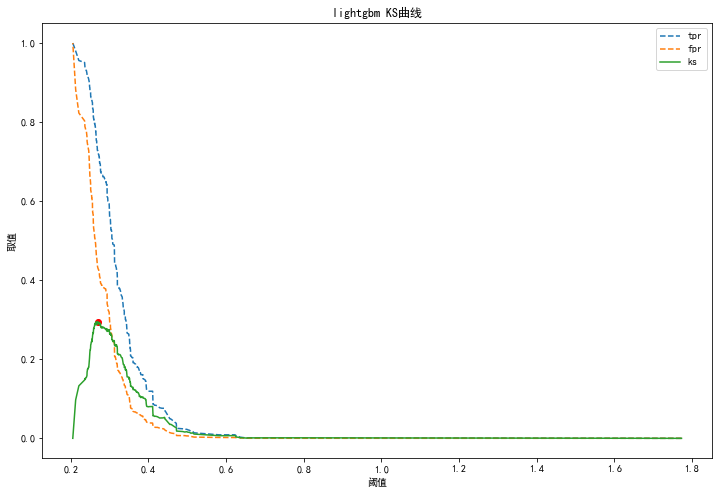

In [32]:
fpr, tpr, thresholds = roc_curve(result['label'], result['lightgbm'])
plt.figure(figsize=(12, 8))
plt.plot(thresholds, tpr, label='tpr', linestyle='--')
plt.plot(thresholds, fpr, label='fpr', linestyle='--')
ks = np.abs(fpr - tpr)
max_idx = ks.argmax()
plt.plot(thresholds, ks, label='ks')
plt.scatter(thresholds[max_idx], ks[max_idx], marker='o', color='red')
plt.xlabel('阈值')
plt.ylabel('取值')
plt.title('lightgbm KS曲线')
# plt.annotate('threshold: {}'.format(thresholds[max_idx]), xy=(thresholds[max_idx], ks[max_idx]))
plt.legend()
plt.show()

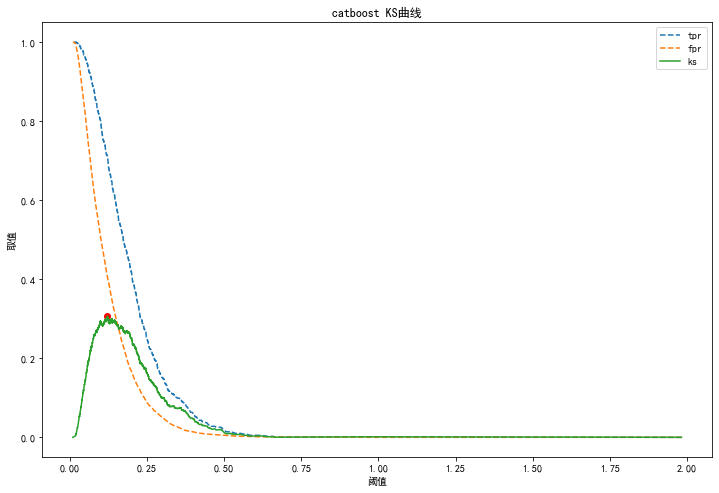

In [33]:
fpr, tpr, thresholds = roc_curve(result['label'], result['catboost'])
plt.figure(figsize=(12, 8))
plt.plot(thresholds, tpr, label='tpr', linestyle='--')
plt.plot(thresholds, fpr, label='fpr', linestyle='--')
ks = np.abs(fpr - tpr)
max_idx = ks.argmax()
plt.plot(thresholds, ks, label='ks')
plt.scatter(thresholds[max_idx], ks[max_idx], marker='o', color='red')
plt.xlabel('阈值')
plt.ylabel('取值')
plt.title('catboost KS曲线')
# plt.annotate('threshold: {}'.format(thresholds[max_idx]), xy=(thresholds[max_idx], ks[max_idx]))
plt.legend()
plt.show()

## 深度森林相关

In [ ]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

from src.process import Processor, TranTestSplit
from src.models import ModelHub
from src.metric import Metric

In [ ]:
df = pd.read_csv('data/train.csv')
processor = Processor(df)
processor.sample(pos_frac=0.05, neg_frac=0.1)
feature, label = processor.data_preprocess_v1()

n_split = 5
tts = TranTestSplit(feature, label)
train_x, train_y, test_x, test_y = tts.split()

In [ ]:
result = []
result.append(get_result(
    model_name='deep_forest',
    model_instance=ModelHub('deep_forest'),
    train_x=train_x,
    train_y=train_y,
    test_x=test_x,
    test_y=test_y
))

result.append(get_result(
    model_name='hg_deep_forest',
    model_instance=HGDeepForestClassifier(),
    train_x=train_x,
    train_y=train_y,
    test_x=test_x,
    test_y=test_y
))

result.append(get_result(
    model_name='hg_deep_forest_lr',
    model_instance=HGDeepForestClassifier(use_predictor=True),
    train_x=train_x,
    train_y=train_y,
    test_x=test_x,
    test_y=test_y
))


result.append(get_result(
    model_name='stack_lr',
    model_instance=StackingLR(),
    train_x=train_x,
    train_y=train_y,
    test_x=test_x,
    test_y=test_y
))

result.append(get_result(
    model_name='res_hg_deep_forest',
    model_instance=ResHGDeepForest('hg_deep_forest', 3),
    train_x=train_x,
    train_y=train_y,
    test_x=test_x,
    test_y=test_y
))

result.append(get_result(
    model_name='res_deep_forest',
    model_instance=ResHGDeepForest('deep_forest', 3),
    train_x=train_x,
    train_y=train_y,
    test_x=test_x,
    test_y=test_y
))

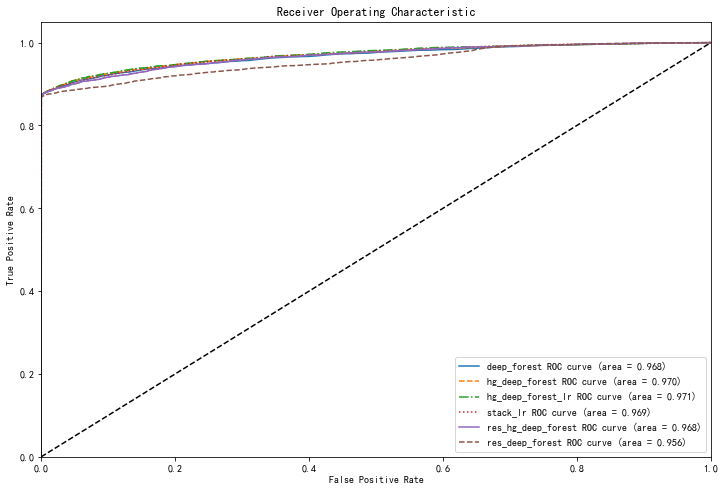

In [23]:
plt.figure(figsize=(12, 8))
curves = dict()
for r in result:
    if r['proba'].ndim == 1:
        curves[r['model_name']] = [r['label'], r['proba']]
    else:
        curves[r['model_name']] = [r['label'], r['proba'][:, 1]]
Metric.gather_roc_curve(curves)

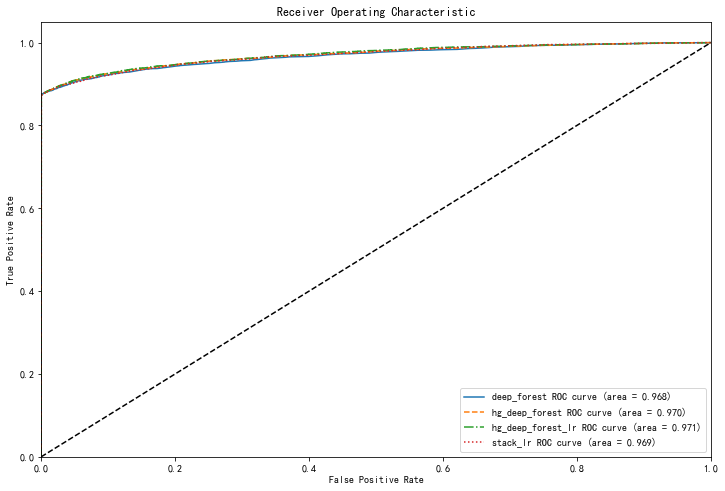

In [24]:
plt.figure(figsize=(12, 8))
curves = dict()
for r in result:
    if r['model_name'] not in ['deep_forest', 'hg_deep_forest', 'hg_deep_forest_lr', 'stack_lr']:
        continue
    if r['proba'].ndim == 1:
        curves[r['model_name']] = [r['label'].values, r['proba']]
    else:
        curves[r['model_name']] = [r['label'].values, r['proba'][:, 1]]
Metric.gather_roc_curve(curves)

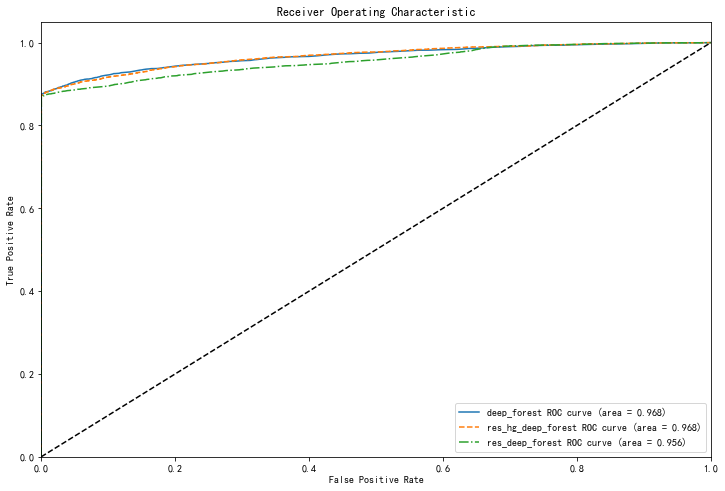

In [25]:
plt.figure(figsize=(12, 8))
curves = dict()
for r in result:
    if r['model_name'] not in ['deep_forest', 'res_deep_forest', 'res_hg_deep_forest']:
        continue
    if r['proba'].ndim == 1:
        curves[r['model_name']] = [r['label'].values, r['proba']]
    else:
        curves[r['model_name']] = [r['label'].values, r['proba'][:, 1]]
Metric.gather_roc_curve(curves)